<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/ai_graphs_representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph representations

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 2>/dev/null

In [2]:
import random
import numpy as np
import networkx as nx

from algorithmic_complexity.aclib import graphstuff as gs

## Adjacency Matrix

Generate random adjacency matrix with n vertices y m edges

In [3]:
def genAdjMatrix(n, m: int):
  mat = [[0]*n for _ in range(n)]

  temp = [1]*m
  temp += [0]*(n**2 - m)

  random.shuffle(temp)

  for i in range(n):
    for j in range(n):
      mat[i][j] = temp[i*n + j]

  return mat

In [4]:
G = genAdjMatrix(7, 13)
G

[[0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0]]

The same but using numpy

In [5]:
def genAdjMatrixnp(n, m: int):
  mat = np.zeros(n*n)
  mat[:m] = 1
  np.random.shuffle(mat)
  return mat.reshape((n, n))

In [6]:
Gnp = genAdjMatrixnp(7, 13)
print(Gnp)

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


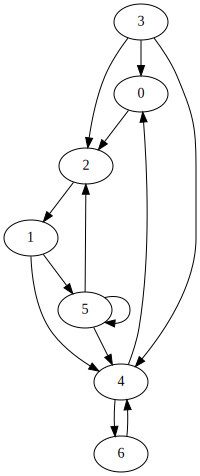

In [7]:
G = nx.from_numpy_matrix(Gnp, create_using=nx.DiGraph)
gs.as_gv(G)

# Adjacency List

Random adjacency list with n vertices and m edges

In [8]:
def genAdjList(n, m: int):
  L = [[] for _ in range(n)]
  cont = 0
  while cont < m:
    u = random.randint(0, n-1)
    v = random.randint(0, n-1)
    if u != v and v not in L[u]:
      L[u].append(v)
      cont += 1
    
  return L

In [9]:
Gal = genAdjList(7, 13)
for u, edges in enumerate(Gal):
  print(u, *edges)

0 3
1 3 2
2 0
3 0 2
4 0 5 1 3
5 6
6 2 1


In [10]:
%%file 1.adjlist
0 3
1 3 2
2 0
3 0 2
4 0 5 1 3
5 6
6 2 1

Overwriting 1.adjlist


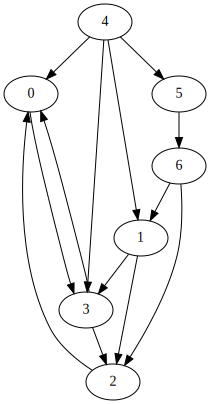

In [12]:
G = nx.read_adjlist('1.adjlist', create_using=nx.DiGraph)
gs.as_gv(G)